<a href="https://colab.research.google.com/github/Neha9492/Real-Estate-Data-Science-Project/blob/main/Real_Estate_Dubai_Analysis_ValuationFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real Estate of Dubai - Analysis and Prediction
##Valuation Dataset
Fields in this dataset are as below:

*   Row status
*   Property_Id

*   Property Type
*   Property Sub Type

*   Valuation date
*   Procedure and Actual area in sq ft

*   Valuation amount as actual_worth and total_value

## **Importing**

###Importing libraries and dataset
* Pandas Library helps us create and handle dataset in dataframe(https://pandas.pydata.org/)
* Numpy
* Matplotlib Pyplot
* sklearn/sci-kit learn is an exhaustive library supporting various algorithms for classifiacation, regression and others
* GradientBoostingRegressor: regression algorithm for modelling(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
* train_test_split: splits datasets into randomized train and test sets(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* GridSearchCV: used for hyperparameter tuning(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
#Import datasets from the csv files
vdf = pd.read_csv('./Valuation.csv')


In [ ]:
#head() gives us first few rows of the dataframe, this gives a peek into the content of the dataframe
vdf.head()

,procedure_id,procedure_name_ar,procedure_name_en,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_ar,property_type_en,property_sub_type_id,property_sub_type_ar,property_sub_type_en,area_id,area_name_ar,area_name_en,actual_area,property_total_value
0,24,تقييم عقار,Property Evaluation,2005,254,30-04-2005,9750000.0,COMPLETED,696.77,1,ارض,Land,62.0,تجارية,Commercial,239.0,البراحه,Al Baraha,696.77,9750000.0
1,24,تقييم عقار,Property Evaluation,2001,259,23-10-2001,0.0,COMPLETED,1159.24,1,ارض,Land,63.0,سكنية,Residential,318.0,جميرا الثالثه,Jumeirah Third,1159.24,NaN
2,24,تقييم عقار,Property Evaluation,2009,261,16-03-2009,39883500.0,COMPLETED,2470.20,1,ارض,Land,62.0,تجارية,Commercial,368.0,البرشاء الاولى,Al Barsha First,2470.20,39883500.0
3,24,تقييم عقار,Property Evaluation,2004,268,18-04-2004,4000000.0,COMPLETED,4455.35,1,ارض,Land,11.0,مخازن او مستودعات,Warehouse,319.0,راس الخور الصناعيه الثانيه,Ras Al Khor Industrial Second,4455.35,4000000.0
4,24,تقييم عقار,Property Evaluation,2006,272,22-03-2006,3000000.0,COMPLETED,1393.55,1,ارض,Land,63.0,سكنية,Residential,369.0,البرشاء الثالثه,Al Barsha Third,1393.55,3000000.0


In [ ]:
#tdf.head()

## **Data Cleaning**

###Dropping columns and understanding metadata
#####Dropping fields which are either redundant or not required for our analysis, this helps us reduce dimensions of the data and analyse only relevant data.
######The arabic names for fields such as procedure_name_ar, property_type_ar etc are translated into english values in a different column, so we are removing the arabic columns for simplicity.

In [ ]:
vdf = vdf.drop(['procedure_id','procedure_name_ar','procedure_name_en','property_type_ar','property_sub_type_ar','area_name_ar'],axis=1)

* head() method from pandas library helps us review the few rows of the dataset, this sneak peek is useful to understand the content of the dataset.

In [ ]:
vdf.head()

,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value
0,2005,254,30-04-2005,9750000.0,COMPLETED,696.77,1,Land,62.0,Commercial,239.0,Al Baraha,696.77,9750000.0
1,2001,259,23-10-2001,0.0,COMPLETED,1159.24,1,Land,63.0,Residential,318.0,Jumeirah Third,1159.24,NaN
2,2009,261,16-03-2009,39883500.0,COMPLETED,2470.20,1,Land,62.0,Commercial,368.0,Al Barsha First,2470.20,39883500.0
3,2004,268,18-04-2004,4000000.0,COMPLETED,4455.35,1,Land,11.0,Warehouse,319.0,Ras Al Khor Industrial Second,4455.35,4000000.0
4,2006,272,22-03-2006,3000000.0,COMPLETED,1393.55,1,Land,63.0,Residential,369.0,Al Barsha Third,1393.55,3000000.0


* .info() method from pandas library gives understanding of the metadata in the dataframe, we get to know the columns and their data types, count etc. This will be crucial to EDA in further steps.

In [ ]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59389 entries, 0 to 59388
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   procedure_year        59389 non-null  int64  
 1   procedure_number      59389 non-null  int64  
 2   instance_date         59389 non-null  object 
 3   actual_worth          59326 non-null  float64
 4   row_status_code       59389 non-null  object 
 5   procedure_area        59373 non-null  float64
 6   property_type_id      59389 non-null  int64  
 7   property_type_en      59389 non-null  object 
 8   property_sub_type_id  55564 non-null  float64
 9   property_sub_type_en  55564 non-null  object 
 10  area_id               59387 non-null  float64
 11  area_name_en          59387 non-null  object 
 12  actual_area           59389 non-null  float64
 13  property_total_value  58672 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 6.3+ MB


* describe() method helps us understand statistical information of the numerical columns, like mean, min, max and quartiles.

In [ ]:
vdf.describe()

,procedure_year,procedure_number,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value
count,59389.000000,59389.000000,5.932600e+04,5.937300e+04,59389.000000,55564.000000,59387.000000,5.938900e+04,5.867200e+04
mean,2014.879742,2632.494553,3.550633e+07,1.492515e+04,1.517065,56.621158,358.739067,1.327961e+04,3.586130e+07
std,4.199673,2110.934692,2.255928e+08,3.854357e+05,0.865062,15.044037,78.952401,3.916868e+05,2.264686e+08
min,2000.000000,1.000000,-1.000000e+00,0.000000e+00,1.000000,1.000000,230.000000,0.000000e+00,0.000000e+00
25%,2013.000000,820.000000,1.821507e+06,2.081000e+02,1.000000,60.000000,306.000000,2.088500e+02,1.927112e+06
50%,2016.000000,2117.000000,5.874206e+06,1.021930e+03,1.000000,62.000000,350.000000,1.021930e+03,6.000000e+06
75%,2018.000000,4045.000000,2.100000e+07,2.787080e+03,2.000000,63.000000,410.000000,2.774360e+03,2.160765e+07
max,2021.000000,8334.000000,1.638402e+10,5.070624e+07,3.000000,113.000000,531.000000,5.247279e+07,1.638402e+10


* Observations from the above:Numeric values in 0 or negative values are basically junk data entered, they can askew our range and deviate the model, so we will look into removing them or replacing them.
* Procedure year is from 2000 to 2021
* Minimum area value is 0
*Minimum worth and value is -1

###Row_status_code

* Removing the rows in "Cancelled" or "Entered" development status as it is not relevant to our study, these rows stand for properties which were cancelled for development or have been recently entered into planning.

In [ ]:
actualvDf = vdf[vdf.row_status_code != "CANCELLED"]
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value
0,2005,254,30-04-2005,9750000.0,COMPLETED,696.77,1,Land,62.0,Commercial,239.0,Al Baraha,696.77,9750000.0
1,2001,259,23-10-2001,0.0,COMPLETED,1159.24,1,Land,63.0,Residential,318.0,Jumeirah Third,1159.24,NaN
2,2009,261,16-03-2009,39883500.0,COMPLETED,2470.20,1,Land,62.0,Commercial,368.0,Al Barsha First,2470.20,39883500.0
3,2004,268,18-04-2004,4000000.0,COMPLETED,4455.35,1,Land,11.0,Warehouse,319.0,Ras Al Khor Industrial Second,4455.35,4000000.0
4,2006,272,22-03-2006,3000000.0,COMPLETED,1393.55,1,Land,63.0,Residential,369.0,Al Barsha Third,1393.55,3000000.0


* Converting the row_status_code to numerical values.
######Defining a dictionary to contain the dictated values and the orginal values, and using the function statusgroup(), passing each row and replacing the values into the dictated values.

In [ ]:
statusgroups = {1: "COMPLETED",
                  2: "ENTERED",
                  3: "None"
                   }
def statusgroup(row_status_code):
    if row_status_code == 'COMPLETED':
       return "1"
    elif row_status_code == 'ENTERED':
       return "2"
    else:
      return "3"

In [ ]:
actualvDf['row_status']= actualvDf['row_status_code'].apply(statusgroup)
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,row_status_code,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status
0,2005,254,30-04-2005,9750000.0,COMPLETED,696.77,1,Land,62.0,Commercial,239.0,Al Baraha,696.77,9750000.0,1
1,2001,259,23-10-2001,0.0,COMPLETED,1159.24,1,Land,63.0,Residential,318.0,Jumeirah Third,1159.24,NaN,1
2,2009,261,16-03-2009,39883500.0,COMPLETED,2470.20,1,Land,62.0,Commercial,368.0,Al Barsha First,2470.20,39883500.0,1
3,2004,268,18-04-2004,4000000.0,COMPLETED,4455.35,1,Land,11.0,Warehouse,319.0,Ras Al Khor Industrial Second,4455.35,4000000.0,1
4,2006,272,22-03-2006,3000000.0,COMPLETED,1393.55,1,Land,63.0,Residential,369.0,Al Barsha Third,1393.55,3000000.0,1


In [ ]:
actualvDf=actualvDf.drop(['row_status_code'],axis=1)
actualvDf.head()

,procedure_year,procedure_number,instance_date,actual_worth,procedure_area,property_type_id,property_type_en,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status
0,2005,254,30-04-2005,9750000.0,696.77,1,Land,62.0,Commercial,239.0,Al Baraha,696.77,9750000.0,1
1,2001,259,23-10-2001,0.0,1159.24,1,Land,63.0,Residential,318.0,Jumeirah Third,1159.24,NaN,1
2,2009,261,16-03-2009,39883500.0,2470.20,1,Land,62.0,Commercial,368.0,Al Barsha First,2470.20,39883500.0,1
3,2004,268,18-04-2004,4000000.0,4455.35,1,Land,11.0,Warehouse,319.0,Ras Al Khor Industrial Second,4455.35,4000000.0,1
4,2006,272,22-03-2006,3000000.0,1393.55,1,Land,63.0,Residential,369.0,Al Barsha Third,1393.55,3000000.0,1


#### **Correlation between columns**
* Many columns have similar values, like actual_worth and Property_total_value, if these columns are strongly correlated, we can drop one of them to reduce dimensions.

In [ ]:
actualvDf.shape

(59389, 14)

In [ ]:
actualvDf.corr()

,procedure_year,procedure_number,actual_worth,procedure_area,property_type_id,property_sub_type_id,area_id,actual_area,property_total_value
procedure_year,1.000000,0.379248,0.005142,0.001366,0.234575,-0.106524,0.287271,0.002506,0.000461
procedure_number,0.379248,1.000000,0.000949,-0.001126,0.165053,-0.042846,0.160746,0.000961,-0.000873
actual_worth,0.005142,0.000949,1.000000,0.184782,-0.088157,0.005448,0.003703,0.161314,0.998238
procedure_area,0.001366,-0.001126,0.184782,1.000000,-0.022779,-0.012839,0.036187,0.822938,0.183485
property_type_id,0.234575,0.165053,-0.088157,-0.022779,1.000000,-0.134091,0.311435,-0.019916,-0.089377
property_sub_type_id,-0.106524,-0.042846,0.005448,-0.012839,-0.134091,1.000000,-0.157755,-0.013192,0.006035
area_id,0.287271,0.160746,0.003703,0.036187,0.311435,-0.157755,1.000000,0.032829,0.002179
actual_area,0.002506,0.000961,0.161314,0.822938,-0.019916,-0.013192,0.032829,1.000000,0.161126
property_total_value,0.000461,-0.000873,0.998238,0.183485,-0.089377,0.006035,0.002179,0.161126,1.000000


###Actual_worth and Property_total_value
* correlation of 0.998238 between these columns indicates they are strongly correlated so we can drop the one of the columns.


In [ ]:
actualvDf.isnull().sum()

procedure_year             0
procedure_number           0
instance_date              0
actual_worth              63
procedure_area            16
property_type_id           0
property_type_en           0
property_sub_type_id    3825
property_sub_type_en    3825
area_id                    2
area_name_en               2
actual_area                0
property_total_value     717
row_status                 0
dtype: int64

* Remove null values from actual_worth (which account for 14 rows in the dataset)

In [ ]:
actualvDf = actualvDf.drop(['actual_worth'],axis=1)

###Property_type
* property_type_en and property_type_id are categorical to same values as below:
    Land: 1
    Building: 2
    Unit: 3
* Dropping property_type_en as it is encoded in property_type_id

In [ ]:
actualvDf=actualvDf.drop(['property_type_en'],axis=1)
actualvDf.head()

,procedure_year,procedure_number,instance_date,procedure_area,property_type_id,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status
0,2005,254,30-04-2005,696.77,1,62.0,Commercial,239.0,Al Baraha,696.77,9750000.0,1
1,2001,259,23-10-2001,1159.24,1,63.0,Residential,318.0,Jumeirah Third,1159.24,NaN,1
2,2009,261,16-03-2009,2470.20,1,62.0,Commercial,368.0,Al Barsha First,2470.20,39883500.0,1
3,2004,268,18-04-2004,4455.35,1,11.0,Warehouse,319.0,Ras Al Khor Industrial Second,4455.35,4000000.0,1
4,2006,272,22-03-2006,1393.55,1,63.0,Residential,369.0,Al Barsha Third,1393.55,3000000.0,1


###Property_sub_type
* Property_sub_type contains diverse categories which is exhaustive however, they can be categorised into three below basic categories based on the business understanding.
* Also, dropping the other General use sub types as our analysis is focussed on Residential and commercial use properties.

##### Pulling all the irrelevant property sub types in a single list, it will help us drop them at a time.

In [ ]:
drop_lst = ["Bus station & drivers residenc", 
"Car Services", 
"CHURCH", 
"Clinic", 
"Consulate", 
"Commercial", 
"Cooling Station", 
"Electricity Station", 
"Embassy", 
"Exhbition Center", 
"Funeral Gathering", 
"General Authority", 
"General Services", 
"General Use", 
"Government Housing", 
"Ground Level Parcking", 
"Gymnasium", 
"Health Club", 
"Hospital", 
"Hotel", 
"Labor Camp", 
"Mosque", 
"Multi Store Parcking", 
"Parking", 
"Organizations", 
"Petrol Station", 
"Railway Station", 
"Plants shop", 
"School", 
"Rest Area", 
"Sports Club", 
"Shopping Mall", 
"Sized Partition", 
"Warehouse", 
"Workshop"]


In [ ]:
actualvDf.property_sub_type_en.replace(to_replace=drop_lst, value='Other', inplace=True)
actualvDf = actualvDf[actualvDf.property_sub_type_en != 'Other']
actualvDf.head()

,procedure_year,procedure_number,instance_date,procedure_area,property_type_id,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status
1,2001,259,23-10-2001,1159.24,1,63.0,Residential,318.0,Jumeirah Third,1159.24,NaN,1
4,2006,272,22-03-2006,1393.55,1,63.0,Residential,369.0,Al Barsha Third,1393.55,3000000.0,1
5,2005,275,08-05-2005,4869.60,1,65.0,Industrial,378.0,Al Garhoud,4869.60,26208000.0,1
8,2005,285,09-05-2005,1393.55,1,63.0,Residential,393.0,Al Barsha Second,1393.55,2170000.0,1
9,2006,285,28-03-2006,1393.55,1,63.0,Residential,314.0,Al Saffa Second,1393.55,4500000.0,1


####Categorising the various diverse sub types into broader categories as Residential and Commercial.
* Defining a dictionary with the values and the dictated meanings, as 1 stands for Commercial, 2 for Residential and 3 for None of them.
*   Commercial for office, industrial, shop etc
    Residential for flat, building etc

###### Defining a function to pass each row value and replace them into the category values as 1, 2 or 3.

In [ ]:
propertygroups = {1: "Commercial",
                  2: "Residential",
                  3: "None"
                   }
def propgroup(property_sub):
    if property_sub is 42:
       return "1"
    elif property_sub == 65: #industrial
       return "1"
    elif property_sub == 23: #shop
       return "1"
    elif property_sub == 17: #shopping mall
       return "1"
    elif property_sub == 4: #villa
       return "2"
    elif property_sub == 3: #unit
       return "2"
    elif property_sub == 63: #residential 
       return "2"
    elif property_sub == 38: #residential flat 
       return "2"
    elif property_sub == 60: #flat
       return "2"
    elif property_sub == 101: #hotel apartment
       return "2"
    else:
       return "3"
  

In [ ]:
actualvDf['property_category']= actualvDf['property_sub_type_id'].apply(propgroup)

In [ ]:
actualvDf.tail(15)

,procedure_year,procedure_number,instance_date,procedure_area,property_type_id,property_sub_type_id,property_sub_type_en,area_id,area_name_en,actual_area,property_total_value,row_status,property_category
59363,2021,2406,20-06-2021,87.02,3,60.0,Flat,507.0,Al Yelayiss 2,87.02,6.632820e+05,1,2
59364,2021,2407,20-06-2021,58.61,3,60.0,Flat,442.0,Al Barsha South Fifth,58.61,5.668991e+05,1,2
59367,2021,2498,24-06-2021,647.26,1,63.0,Residential,382.0,Al Waheda,647.26,6.967000e+03,2,2
59368,2021,2499,24-06-2021,23109.90,1,63.0,Residential,396.0,Al Khawaneej First,23109.90,0.000000e+00,2,2
59369,2021,2163,03-06-2021,1557.28,1,63.0,Residential,412.0,Al Merkadh,1557.28,1.676241e+07,1,2
59373,2021,2167,03-06-2021,230.70,3,42.0,Office,350.0,Al Thanyah Fifth,230.70,1.607872e+06,1,3
59374,2021,2168,03-06-2021,1263.48,1,63.0,Residential,303.0,Um Suqaim First,1263.48,7.500000e+06,1,2
59376,2021,2170,03-06-2021,1393.55,1,63.0,Residential,359.0,Al Twar Third,1393.55,3.500000e+06,1,2
59380,2021,2176,03-06-2021,76.83,3,60.0,Flat,484.0,Nadd Hessa,76.83,5.154589e+05,1,2
59381,2021,2177,03-06-2021,2197513.72,1,63.0,Residential,451.0,Al Hebiah Fifth,2197513.72,1.300960e+09,1,2


##### Dropping the property_sub_type_en column as it has been used to categorise into property_categories

In [ ]:
actualvDf=actualvDf.drop(['property_sub_type_en', 'property_sub_type_id'],axis=1)


In [ ]:
actualvDf.head()

,procedure_year,procedure_number,instance_date,procedure_area,property_type_id,area_id,area_name_en,actual_area,property_total_value,row_status,property_category
1,2001,259,23-10-2001,1159.24,1,318.0,Jumeirah Third,1159.24,NaN,1,2
4,2006,272,22-03-2006,1393.55,1,369.0,Al Barsha Third,1393.55,3000000.0,1,2
5,2005,275,08-05-2005,4869.60,1,378.0,Al Garhoud,4869.60,26208000.0,1,1
8,2005,285,09-05-2005,1393.55,1,393.0,Al Barsha Second,1393.55,2170000.0,1,2
9,2006,285,28-03-2006,1393.55,1,314.0,Al Saffa Second,1393.55,4500000.0,1,2


In [ ]:
actualvDf.shape

(40300, 11)

###Area_id and Area_name_en
* Copying over the original dataframe to a new one, and keeping only area related fields to create a reference for the areas and their area Ids.

In [ ]:

areaDf=actualvDf
areaDf = areaDf.drop(['procedure_year','procedure_number','instance_date','property_type_id','procedure_area','actual_area','property_total_value','row_status','property_category'],axis=1)
areaDf.head()

,area_id,area_name_en
1,318.0,Jumeirah Third
4,369.0,Al Barsha Third
5,378.0,Al Garhoud
8,393.0,Al Barsha Second
9,314.0,Al Saffa Second


In [ ]:
areaDf.shape

(40300, 2)

#####Dropping duplicates to have a unique list of area names and their associated Ids

In [ ]:
areaDf = areaDf.drop_duplicates()
areaDf.shape

(201, 2)

#####Sorting areas as per the area_id

In [ ]:
areaDf = areaDf.sort_values(by=['area_id'])

In [ ]:
areaDf.head(15)

,area_id,area_name_en
25,230.0,Abu Hail
112,231.0,Al Mamzer
28,232.0,Mirdif
13,233.0,Hor Al Anz
78,234.0,Hor Al Anz East
1979,235.0,Eyal Nasser
13286,237.0,Al Sabkha
949,238.0,Al Dhagaya
368,239.0,Al Baraha
774,240.0,Port Saeed


#####Dropping area_name_en from original DF as we have stored the area_id and corresponding names in a new DF areaDf, for future reference

In [ ]:
actualvDf=actualvDf.drop(['area_name_en'],axis=1)


In [ ]:
actualvDf.head()

,procedure_year,procedure_number,instance_date,procedure_area,property_type_id,area_id,actual_area,property_total_value,row_status,property_category
1,2001,259,23-10-2001,1159.24,1,318.0,1159.24,NaN,1,2
4,2006,272,22-03-2006,1393.55,1,369.0,1393.55,3000000.0,1,2
5,2005,275,08-05-2005,4869.60,1,378.0,4869.60,26208000.0,1,1
8,2005,285,09-05-2005,1393.55,1,393.0,1393.55,2170000.0,1,2
9,2006,285,28-03-2006,1393.55,1,314.0,1393.55,4500000.0,1,2


###Procedure_area and Actual_area
* The coreraltion value 0.822938 indicates strong correlation between the two columns so we can remove one of them for minimizing dimensions of the data.

In [ ]:
actualvDf.head()

,procedure_year,procedure_number,instance_date,procedure_area,property_type_id,area_id,actual_area,property_total_value,row_status,property_category
1,2001,259,23-10-2001,1159.24,1,318.0,1159.24,NaN,1,2
4,2006,272,22-03-2006,1393.55,1,369.0,1393.55,3000000.0,1,2
5,2005,275,08-05-2005,4869.60,1,378.0,4869.60,26208000.0,1,1
8,2005,285,09-05-2005,1393.55,1,393.0,1393.55,2170000.0,1,2
9,2006,285,28-03-2006,1393.55,1,314.0,1393.55,4500000.0,1,2


In [ ]:
actualvDf = actualvDf.drop(['actual_area'],axis=1)

###Instance_date and Procedure_year
* The date columns can be tricky to deal with as they can be in different formats.
* Formatting the instance Date and deducing the year and month of valuation, as the date itself is not relevant to the study.
* Compare Procedure_year and year from instance date if they are correlated, and it one of them can be removed.

In [ ]:
actualvDf['instance_date'] = pd.to_datetime(actualvDf.instance_date)

actualvDf['Year'] = actualvDf['instance_date'].dt.year
actualvDf['Month'] = actualvDf['instance_date'].dt.month


In [ ]:
actualvDf.corr()

,procedure_year,procedure_number,procedure_area,property_type_id,area_id,property_total_value,Year,Month
procedure_year,1.000000,0.339890,-0.000989,0.261397,0.294188,-0.002423,0.999945,-0.037424
procedure_number,0.339890,1.000000,-0.005191,0.170627,0.157232,-0.011070,0.339796,0.464757
procedure_area,-0.000989,-0.005191,1.000000,-0.032807,0.033261,0.305103,-0.000994,-0.003741
property_type_id,0.261397,0.170627,-0.032807,1.000000,0.287654,-0.117936,0.261257,0.016864
area_id,0.294188,0.157232,0.033261,0.287654,1.000000,0.009477,0.294172,0.022901
property_total_value,-0.002423,-0.011070,0.305103,-0.117936,0.009477,1.000000,-0.002457,-0.007073
Year,0.999945,0.339796,-0.000994,0.261257,0.294172,-0.002457,1.000000,-0.037595
Month,-0.037424,0.464757,-0.003741,0.016864,0.022901,-0.007073,-0.037595,1.000000


#####The correlation between Year and Procedure Year is 0.9999 which indicates very strong correlation and one of them can certainly be dropped.

In [ ]:
actualvDf = actualvDf.drop(['procedure_year'],axis=1)
actualvDf.head()

,procedure_number,instance_date,procedure_area,property_type_id,area_id,property_total_value,row_status,property_category,Year,Month
1,259,2001-10-23,1159.24,1,318.0,NaN,1,2,2001,10
4,272,2006-03-22,1393.55,1,369.0,3000000.0,1,2,2006,3
5,275,2005-08-05,4869.60,1,378.0,26208000.0,1,1,2005,8
8,285,2005-09-05,1393.55,1,393.0,2170000.0,1,2,2005,9
9,285,2006-03-28,1393.55,1,314.0,4500000.0,1,2,2006,3


###Reducing dimensions
* Removing any column left which do not add any relevance to our study.

In [ ]:
actualvDf = actualvDf.drop(['instance_date'],axis=1)

In [ ]:
df = actualvDf
actualvDf = actualvDf.drop(['procedure_number'],axis=1)

In [ ]:
df.head()

,procedure_number,procedure_area,property_type_id,area_id,property_total_value,row_status,property_category,Year,Month
1,259,1159.24,1,318.0,NaN,1,2,2001,10
4,272,1393.55,1,369.0,3000000.0,1,2,2006,3
5,275,4869.60,1,378.0,26208000.0,1,1,2005,8
8,285,1393.55,1,393.0,2170000.0,1,2,2005,9
9,285,1393.55,1,314.0,4500000.0,1,2,2006,3


###Dropping null values
* Null values can create unnecessary complexities to the model so, we can drop the null values after cautious observation.

In [ ]:
actualvDf.shape

(40300, 8)

In [ ]:
actualvDf.isnull().sum()

procedure_area            6
property_type_id          0
area_id                   2
property_total_value    418
row_status                0
property_category         0
Year                      0
Month                     0
dtype: int64

In [ ]:
actualvDf = actualvDf.dropna(axis=0)

In [ ]:
actualvDf.shape

(39874, 8)

In [ ]:
actualvDf.head()

,procedure_area,property_type_id,area_id,property_total_value,row_status,property_category,Year,Month
4,1393.55,1,369.0,3000000.0,1,2,2006,3
5,4869.60,1,378.0,26208000.0,1,1,2005,8
8,1393.55,1,393.0,2170000.0,1,2,2005,9
9,1393.55,1,314.0,4500000.0,1,2,2006,3
13,310.85,1,233.0,5000000.0,1,2,2006,2


In [ ]:
actualvDf.isnull().sum()

procedure_area          0
property_type_id        0
area_id                 0
property_total_value    0
row_status              0
property_category       0
Year                    0
Month                   0
dtype: int64

##**EDA** - Exploratory Data Analysis
* EDA is an approach to understand the data and summarize its main characteristics, through data visualizations and statistical techniques.
* EDA can give insight into the dataset which are alien to our nake eyes.

In [ ]:
actualvDf.head()

,procedure_area,property_type_id,area_id,property_total_value,row_status,property_category,Year,Month
4,1393.55,1,369.0,3000000.0,1,2,2006,3
5,4869.60,1,378.0,26208000.0,1,1,2005,8
8,1393.55,1,393.0,2170000.0,1,2,2005,9
9,1393.55,1,314.0,4500000.0,1,2,2006,3
13,310.85,1,233.0,5000000.0,1,2,2006,2


##### Getting the counts of any column can summarize the number of rows each categorical value in the column, this helps us understand the distribution of the data and decide if we want to include them for our analysis.

##### Count of year coulmn shows the total number of rows present for each of the Year value.

In [ ]:
actualvDf.Year.value_counts()

2017    5810
2018    5625
2016    4740
2015    4498
2014    3708
2019    2764
2013    2375
2020    2147
2012    1538
2021    1522
2010     884
2011     867
2008     645
2009     543
2006     531
2005     432
2007     421
2004     396
2003     297
2002     130
2000       1
Name: Year, dtype: int64

In [ ]:
actualvDf.shape

(39874, 8)

#####Looking at the yearly data we can remove the rows corresponding to the years as 2000 to 2011 (the clean data available for these years in not propotionate)

In [ ]:
year_lst = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011]
actualvDf.Year.replace(to_replace=year_lst, value=0000, inplace=True)
actualvDf = actualvDf[actualvDf.Year != 0000]
actualvDf.shape

(34727, 8)

* For the numerical value columns, it is important to understand the range of the values, this helps us gather a meaningful range of the values.

######Range of procedure_area: this shows that the minimum value of the area is 0, which is not viable, so we are going to have a baseline value, which is decided to be 10 m2 with our business understanding.

In [ ]:
actualvDf.describe()

,procedure_area,property_type_id,area_id,property_total_value,Year,Month
count,3.472700e+04,34727.000000,34727.000000,3.472700e+04,34727.000000,34727.000000
mean,1.253721e+04,1.868143,379.542460,2.179380e+07,2016.471074,6.554381
std,3.046040e+05,0.976444,78.938845,1.322016e+08,2.296831,3.515530
min,0.000000e+00,1.000000,230.000000,0.000000e+00,2012.000000,1.000000
25%,1.224500e+02,1.000000,330.000000,1.300000e+06,2015.000000,3.000000
50%,4.645200e+02,1.000000,363.000000,3.138241e+06,2017.000000,6.000000
75%,1.997600e+03,3.000000,444.000000,1.100000e+07,2018.000000,10.000000
max,5.070624e+07,3.000000,531.000000,9.214433e+09,2021.000000,12.000000


In [ ]:
df = actualvDf[actualvDf.procedure_area <= 10]
df.tail(15)

,procedure_area,property_type_id,area_id,property_total_value,row_status,property_category,Year,Month
57696,0.0,1,266.0,27000000.0,1,2,2021,5
59312,0.0,1,266.0,50000000.0,1,3,2021,2


* Dropping rows with procedure_area less than 10

In [ ]:
actualvDf = actualvDf[actualvDf.procedure_area >= 10]
actualvDf.shape

(34725, 8)

#####Count of property_type_id: this shows that the rows are more for Land and Flats, and fewer for the Buildings.

In [ ]:
actualvDf.property_type_id.value_counts()

1    19144
3    14567
2     1014
Name: property_type_id, dtype: int64

* The pie chart representation of the property_type_id fields shows us the graphical representation of data disctribution across the property types.

In [ ]:
fig = px.pie(actualvDf, values='property_category',names='property_type_id', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

* Further categorizing the property type as Land, Flat, Building into Function property_categories as Residential, Commercial, Others. This shows the distribution of each property type in the categories.

Text(0.5, 1.0, 'Property type with categories')

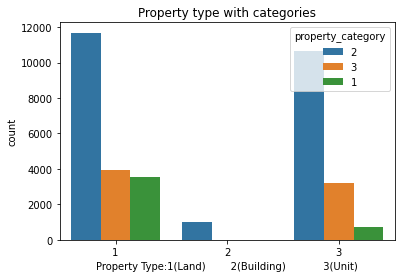

In [ ]:
plt.figure()
fig = sns.countplot(x="property_type_id",hue="property_category",data=actualvDf)
plt.xlabel("Property Type:1(Land)        2(Building)            3(Unit)")
plt.title('Property type with categories')

##### Property_category is an important column for our analysis. Getting the count of procedure_category can help us understand the distribution of data across categories.

In [ ]:
actualvDf.property_category.value_counts()

2    23317
3     7165
1     4243
Name: property_category, dtype: int64

* Visual Representation of the property_category

Text(0.5, 1.0, 'Property categories')

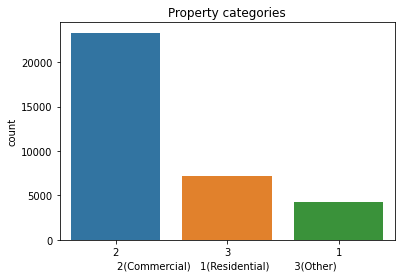

In [ ]:
plt.figure()
fig = sns.countplot(x="property_category",data=actualvDf)
plt.xlabel("2(Commercial)   1(Residential)        3(Other)")
plt.title('Property categories')

##### Count of area_id shows the data present for each of the areas, obviously some of the areas in Dubai are densely occupied for residential or commercial purposes so that reflects the variations in the counts here.

In [ ]:
actualvDf.area_id.value_counts()

330.0    3202
350.0    2165
526.0    2146
390.0    1444
343.0     823
         ... 
496.0       1
411.0       1
476.0       1
531.0       1
508.0       1
Name: area_id, Length: 195, dtype: int64

##### Count of row_status values are indicative of rows present for different statuses.

In [ ]:
actualvDf.row_status.value_counts()

1    34595
2       72
3       58
Name: row_status, dtype: int64

##### Getting Dummy variables
* Converting categorical values to dummy variable through one-hot encoding method, is useful for the ML model for training purposes.

In [ ]:
actualvDf = pd.get_dummies(actualvDf, columns=['area_id','property_type_id','property_category','row_status'])
actualvDf.head()

,procedure_area,property_total_value,Year,Month,area_id_230.0,area_id_231.0,area_id_232.0,area_id_233.0,area_id_234.0,area_id_235.0,area_id_237.0,area_id_238.0,area_id_239.0,area_id_240.0,area_id_242.0,area_id_244.0,area_id_247.0,area_id_248.0,area_id_249.0,area_id_254.0,area_id_255.0,area_id_264.0,area_id_266.0,area_id_267.0,area_id_269.0,area_id_271.0,area_id_276.0,area_id_278.0,area_id_282.0,area_id_284.0,area_id_295.0,area_id_297.0,area_id_298.0,area_id_299.0,area_id_300.0,area_id_301.0,area_id_303.0,area_id_304.0,area_id_305.0,area_id_306.0,...,area_id_482.0,area_id_483.0,area_id_484.0,area_id_485.0,area_id_489.0,area_id_492.0,area_id_493.0,area_id_494.0,area_id_496.0,area_id_497.0,area_id_499.0,area_id_500.0,area_id_502.0,area_id_503.0,area_id_504.0,area_id_506.0,area_id_507.0,area_id_508.0,area_id_509.0,area_id_513.0,area_id_514.0,area_id_515.0,area_id_519.0,area_id_522.0,area_id_523.0,area_id_524.0,area_id_525.0,area_id_526.0,area_id_527.0,area_id_528.0,area_id_531.0,property_type_id_1,property_type_id_2,property_type_id_3,property_category_1,property_category_2,property_category_3,row_status_1,row_status_2,row_status_3
4029,236.44,1400000.00,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4191,7432.26,15450000.00,2012,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
5918,1056.21,1056.21,2012,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
7143,3135.48,2531250.00,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
7146,2181.36,6000000.00,2012,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
col = actualvDf[['property_total_value','Year']]
valDf = col.copy()
valDf.head()

,property_total_value,Year
4029,1400000.00,2012
4191,15450000.00,2012
5918,1056.21,2012
7143,2531250.00,2012
7146,6000000.00,2012


In [ ]:
valDf = valDf[valDf['property_total_value'] > 0]

In [ ]:
valDf = valDf.groupby('Year').agg({'property_total_value': ['median','min','max','count']})
valDf.columns = ['value_median','value_min','value_max','counts']
valDf = valDf.reset_index()
valDf.head(15)

,Year,value_median,value_min,value_max,counts
0,2012,2700000.000,159.9,2.000000e+09,1535
1,2013,3636895.000,50000.0,5.700504e+09,2369
2,2014,5826000.000,274096.0,4.882487e+09,3704
3,2015,3343810.000,83000.0,7.563579e+09,4493
4,2016,3213697.000,219131.0,9.214433e+09,4728
5,2017,2860796.000,232.0,7.563572e+09,5801
6,2018,2264363.500,109759.0,1.887918e+09,5610
7,2019,3770766.000,146345.0,6.958487e+09,2748
8,2020,3075000.000,169983.0,1.150932e+09,2135
9,2021,2835179.605,1.0,6.655944e+09,1478


In [ ]:
fig_s = px.line(valDf, x="Year", y=valDf['value_median'],
              
              title='Plot of Average property values over the Year')
fig_s.update_xaxes(
    dtick="M1",
    tickmode="linear")
fig_s.show()

In [ ]:
fig_c = px.line(valDf, x="Year", y=valDf['counts'],
              
              title='Plot of count of properties over the Years')
fig_c.update_xaxes(
    dtick="M1",
    tickmode="linear")
fig_c.show()

In [ ]:
fig_m = px.line(valDf, x="Year", y=valDf['value_max'],
              
              title='Plot of maximum valuation over the Years')
fig_m.update_xaxes(
    dtick="M1",
    tickmode="linear")
fig_m.show()

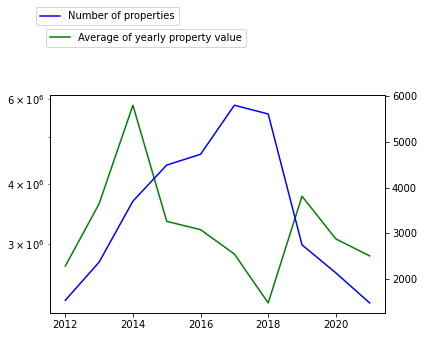

<Figure size 4320x5760 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()


ax.plot(valDf['Year'], valDf['value_median'], color='green', label='Average of yearly property value')
ax.set_yscale('log')
ax.tick_params(axis='y', labelcolor='green')
ax.legend(loc = 'lower right',bbox_to_anchor=(0.6, 1.2))

ax3 = ax.twinx()
ax3.plot(valDf['Year'], valDf['counts'], color='blue', label='Number of properties')
#ax3.tick_params(axis='y', labelcolor='blue')
ax3.legend(loc = 'lower right',bbox_to_anchor=(0.4, 1.3))


plt.figure(figsize=(60,80))
plt.show()

#### Exporting the cleaned dataset into an excel sheet for reference only.

In [ ]:
actualvDf.to_csv('./valuation_cleaned.csv', index=False)

## **Model Selection and Hyperparameter Tuning**

###Declaring the label or target variable and the feature variable in the dataset

In [ ]:
label = actualvDf['property_total_value']
features = actualvDf.drop(['property_total_value'], axis=1)

###Train-Test split
Using train_test_split function to split the features and label rows into TRAIN and TEST sets in randomized state and given ratio

In [ ]:
trainF, testF, trainL, testL = train_test_split(features, label, test_size=0.4, random_state=0)

###Model selection and Hyperparameter tuning
Creating a basic model with default parameters, this is done to observe its performance and provide a direction for further hyperparameter tuning


In [ ]:
gbModel = GradientBoostingRegressor()

##### Fitting the model of the train set (i.e, let the model learn the parameters)

In [ ]:
gbModel.fit(trainF, trainL)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##### Measuring the Mean Squared Absolute Error for Training Data
######Mean Squared Absolute Error is a metric to evaluate the model. It compares the predicted value and the original values.
######.predict() method is how the model adjusts the parameters

In [ ]:
msae = mean_absolute_error(testL, gbModel.predict(testF))
print(msae)

14803135.914025167


#####Defining a function to format and print results from the gridSearch

In [ ]:
def printResults(results):
    print('Best ML Params: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stnDvs = results.cv_results_['std_test_score']

    for mean, stnDvs, params in zip(means, stnDvs, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(
                round(mean, 3),
                round(stnDvs*2, 3),
                params
            )
        )

##### Running the gridSearch with various parameters to find the best combination for our model

In [ ]:
gbModel = GradientBoostingRegressor()

parameters = {
    'n_estimators':[500,1000,1500],      # Number of decision trees 
    'learning_rate':[0.05,0.1,0.2],      # How much time spent learning the parameters
    'max_depth':[5,6,7],                 # Max depth for any decision tree
    'min_samples_leaf':[50],             # Minimum number of types of house to sample
    'max_features':['sqrt'],             # Max percentage of features to take into account by a tree
    'loss':['huber']                     # Function to minimise loss
}

gridSearch = GridSearchCV(gbModel, parameters, cv=5)
gridSearch.fit(trainF, trainL.values.ravel())

printResults(gridSearch)

Best ML Params: {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1500}

0.302 (+/-0.223) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 500}
0.32 (+/-0.243) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1000}
0.322 (+/-0.242) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1500}
0.308 (+/-0.232) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 500}
0.321 (+/-0.239) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1000}
0.325 (+/-0.248) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf'

#####Since we found the hyperparameters, running the model with them finally.

In [78]:
gbModelbest = GradientBoostingRegressor(
    n_estimators=1500,      # Number of decision trees 
    learning_rate=0.2,      # How much time spent learning the parameters
    max_depth=6,            # Max depth for any decision tree
    min_samples_leaf=50,     # Minimum number of types of house to sample
    max_features='sqrt',   # Max percentage of features to take into account by a tree
    loss='huber'            # The function with which to calculate the errors made by the model
)

In [79]:
gbModelbest.fit(trainF, trainL)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='huber',
                          max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
msae = mean_absolute_error(trainL, gbModelbest.predict(trainF))
print(msae)

10788782.98774684


In [81]:
msae = mean_absolute_error(testL, gbModelbest.predict(testF))
print(msae)

13727658.71079464


In [82]:
print("Model Accuracy: %.3f" % gbModelbest.score(trainF, trainL))

Model Accuracy: 0.325


In [83]:
print("Model Accuracy: %.3f" % gbModelbest.score(testF, testL))

Model Accuracy: 0.202


##### Calculating the feature variance of the model, lets us compare the predicted labels and the original values for the test set, visualizing the same helps us understand the fitting of the model.

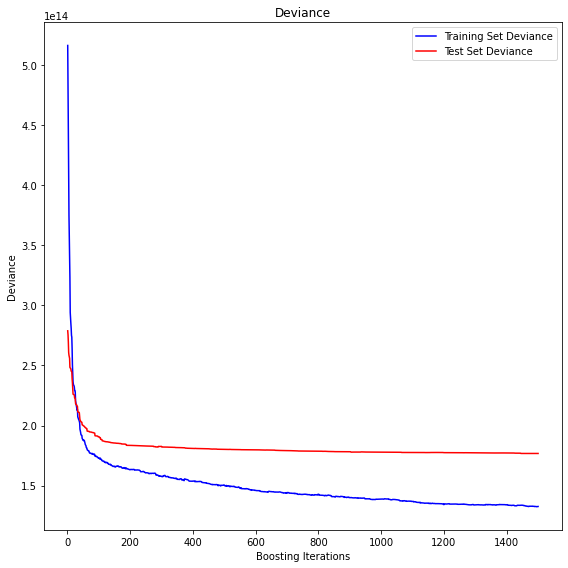

In [84]:
gbr_params ={
    "n_estimators" :1500,      # Number of decision trees 
    "learning_rate":0.2,      # How much time spent learning the parameters
    "max_depth":6,            # Max depth for any decision tree
    "min_samples_leaf":50,     # Minimum number of types of house to sample
    "max_features":'sqrt'}
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbModelbest.staged_predict(testF)):
    test_score[i] = gbModelbest.loss_(testL, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbModelbest.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

##### Observation from the graph:
* The deviance between the tran set prediction and test set prediction follows a similar shape of curve and they are close.
* With the deviance graph, we can understand the fit of the model and identify if it is overfitting or underfitting.
* In our case, the model is a close fit which works for us.

##**Sample prediction**

##### Importing the sample dataset from a csv file

In [91]:
sampleDf = pd.read_csv('./sample.csv')

In [92]:
sampleDf.head()

,procedure_area,Year,Month,area_id_230.0,area_id_231.0,area_id_232.0,area_id_233.0,area_id_234.0,area_id_235.0,area_id_237.0,area_id_238.0,area_id_239.0,area_id_240.0,area_id_242.0,area_id_244.0,area_id_247.0,area_id_248.0,area_id_249.0,area_id_254.0,area_id_255.0,area_id_264.0,area_id_266.0,area_id_267.0,area_id_269.0,area_id_271.0,area_id_276.0,area_id_278.0,area_id_282.0,area_id_284.0,area_id_295.0,area_id_297.0,area_id_298.0,area_id_299.0,area_id_300.0,area_id_301.0,area_id_303.0,area_id_304.0,area_id_305.0,area_id_306.0,area_id_307.0,...,area_id_482.0,area_id_483.0,area_id_484.0,area_id_485.0,area_id_489.0,area_id_492.0,area_id_493.0,area_id_494.0,area_id_496.0,area_id_497.0,area_id_499.0,area_id_500.0,area_id_502.0,area_id_503.0,area_id_504.0,area_id_506.0,area_id_507.0,area_id_508.0,area_id_509.0,area_id_513.0,area_id_514.0,area_id_515.0,area_id_519.0,area_id_522.0,area_id_523.0,area_id_524.0,area_id_525.0,area_id_526.0,area_id_527.0,area_id_528.0,area_id_531.0,property_type_id_1,property_type_id_2,property_type_id_3,property_category_1,property_category_2,property_category_3,row_status_1,row_status_2,row_status_3
0,236.44,2022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


######Using the model to predict the target variable, property_total_value for the sample dataset

In [93]:
val = gbModelbest.predict(sampleDf)

In [94]:
print(val)

[1820466.86322495]


In [149]:
print("Valuation predicted for a land which was valued AED 1400000 in 2012 is expected to grow to the valuation of : %.2f in 2022" % val)

Valuation predicted for a land which was valued AED 1400000 in 2012 is expected to grow to the valuation of : 1820466.86 in 2022


* Sample Prediciton over the next 5 years

In [141]:
sampleaDf = pd.read_csv('./sample1.csv')


In [142]:
sampleaDf.head()

,procedure_area,Year,Month,area_id_230.0,area_id_231.0,area_id_232.0,area_id_233.0,area_id_234.0,area_id_235.0,area_id_237.0,area_id_238.0,area_id_239.0,area_id_240.0,area_id_242.0,area_id_244.0,area_id_247.0,area_id_248.0,area_id_249.0,area_id_254.0,area_id_255.0,area_id_264.0,area_id_266.0,area_id_267.0,area_id_269.0,area_id_271.0,area_id_276.0,area_id_278.0,area_id_282.0,area_id_284.0,area_id_295.0,area_id_297.0,area_id_298.0,area_id_299.0,area_id_300.0,area_id_301.0,area_id_303.0,area_id_304.0,area_id_305.0,area_id_306.0,area_id_307.0,...,area_id_482.0,area_id_483.0,area_id_484.0,area_id_485.0,area_id_489.0,area_id_492.0,area_id_493.0,area_id_494.0,area_id_496.0,area_id_497.0,area_id_499.0,area_id_500.0,area_id_502.0,area_id_503.0,area_id_504.0,area_id_506.0,area_id_507.0,area_id_508.0,area_id_509.0,area_id_513.0,area_id_514.0,area_id_515.0,area_id_519.0,area_id_522.0,area_id_523.0,area_id_524.0,area_id_525.0,area_id_526.0,area_id_527.0,area_id_528.0,area_id_531.0,property_type_id_1,property_type_id_2,property_type_id_3,property_category_1,property_category_2,property_category_3,row_status_1,row_status_2,row_status_3
0,1000,2022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [143]:
vala = gbModelbest.predict(sampleaDf.values)


In [144]:
print(vala)

[17075976.18093812]


In [150]:
print("Valuation predicted for a 1000 sqm Residential Unit in Al Barsha First is : %.2f" % vala)


Valuation predicted for a 1000 sqm Residential Unit in Al Barsha First is : 17075976.18
